In [ ]:
import pandas as pd
import torch
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
from matplotlib import pyplot as plt
import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
print(sklearn.__version__)

1.0.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/processed_data.csv')

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df

,state_x,collection_week,able_to_obtain_ventilator_supplies,able_to_obtain_ventilator_medications,able_to_obtain_n95_masks,able_to_obtain_paprs,able_to_obtain_surgical_masks,able_to_obtain_eye_protection,able_to_obtain_single_use_gowns,able_to_obtain_gloves,inpatient_beds_used_7_day_sum,icu_beds_used_7_day_sum,latitude,longitude,new_case
0,AS,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.254400,-0.940814,-0.076954,0.939209,0.000000
1,AS,2.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.484733,-1.446408,-0.076954,0.939209,0.000000
2,AS,3.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.741642,0.238903,-0.076954,0.939209,0.005556
3,AS,4.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.830231,-0.266690,-0.076954,0.939209,0.000000
4,AS,5.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.785937,0.407434,-0.076954,0.939209,0.011111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,WY,24.0,0.0,0.0,0.846154,0.846154,0.846154,0.846154,0.846154,0.846154,-1.595011,-2.601178,0.238865,0.597507,8.338889
1088,WY,25.0,0.0,0.0,0.791667,0.791667,0.791667,0.791667,0.791667,0.791667,-1.605644,-2.936528,0.238865,0.597507,4.594444
1089,WY,26.0,0.0,0.0,0.807692,0.807692,0.807692,0.807692,0.807692,0.807692,-1.466563,-3.203292,0.238865,0.597507,2.872222
1090,WY,27.0,0.0,0.0,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,-1.663208,-2.781040,0.238865,0.597507,1.766667


In [ ]:
def plot_time_series(df,state,column):
  t = df[df['state_x']==state]['collection_week']
  s = df[df['state_x']==state][column]
  fig, ax = plt.subplots()
  ax.scatter(t, s)
  ax.set(xlabel='time (week)', ylabel='Mask Supply', title= state)
  ax.grid()
  #fig.savefig("test.png")
  plt.show()

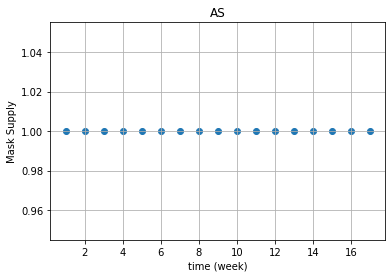

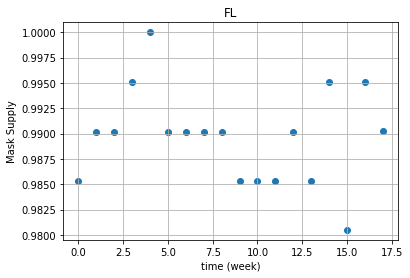

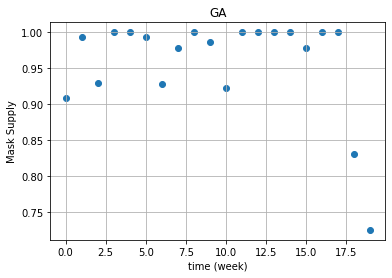

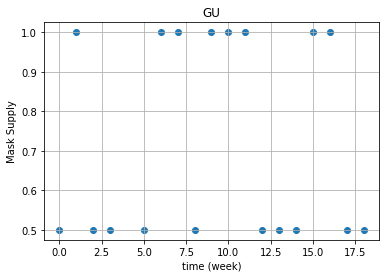

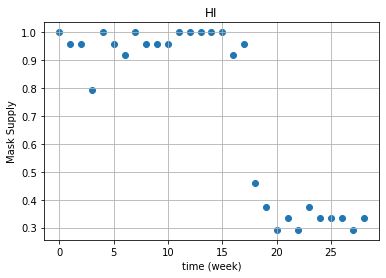

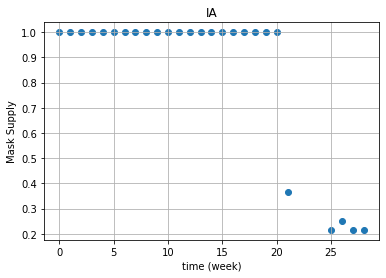

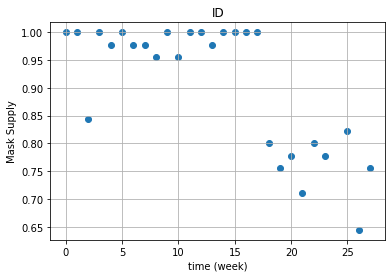

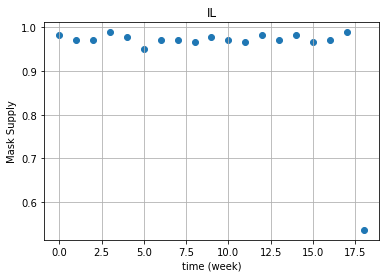

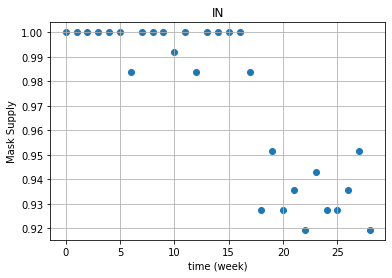

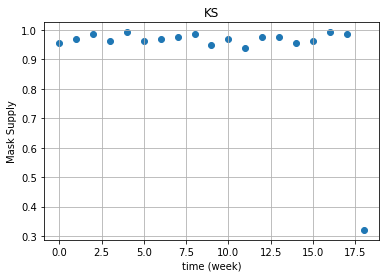

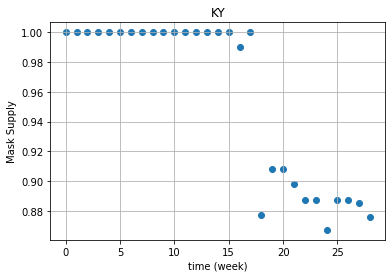

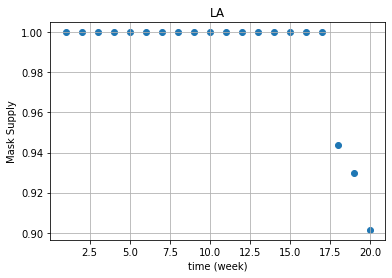

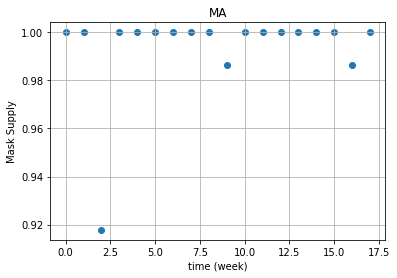

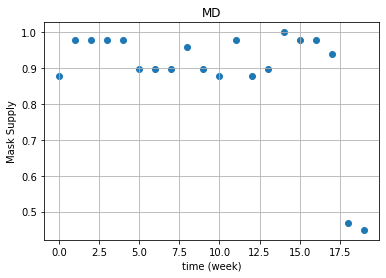

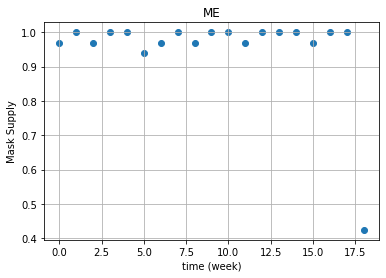

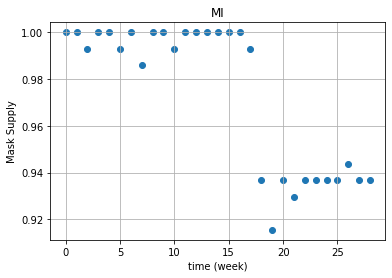

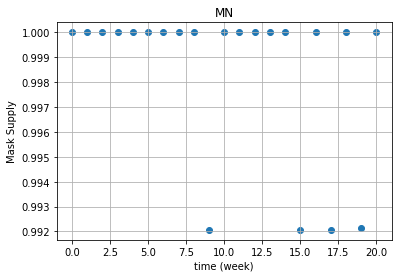

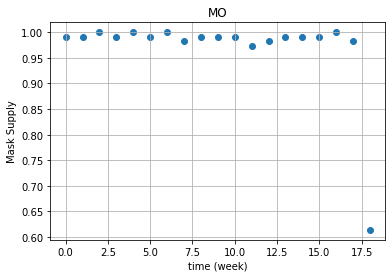

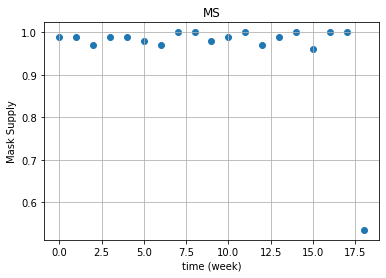

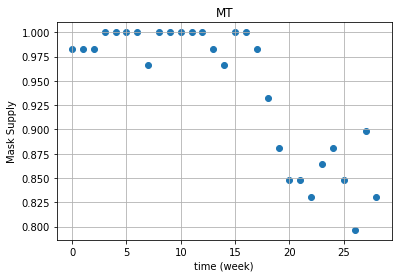

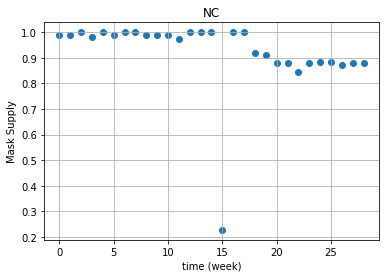

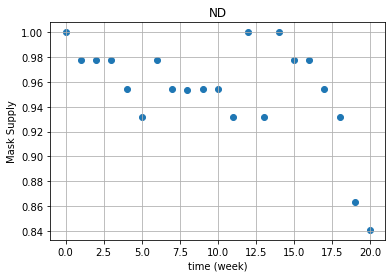

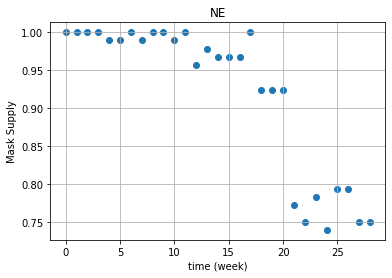

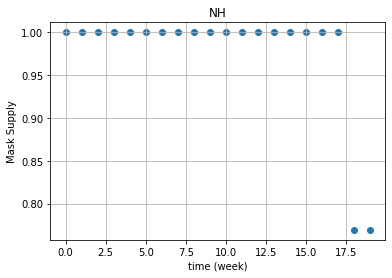

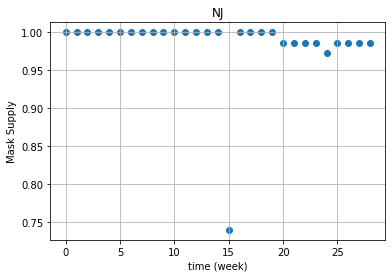

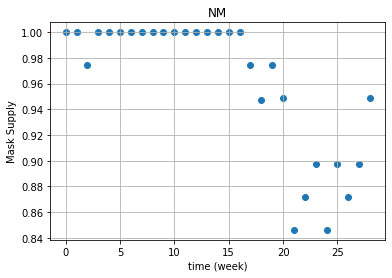

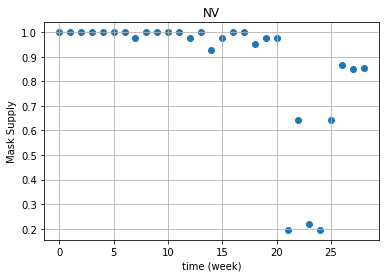

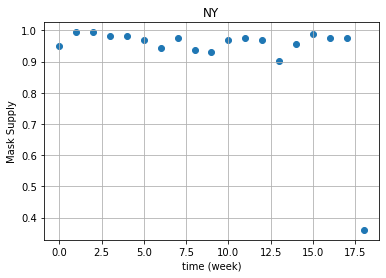

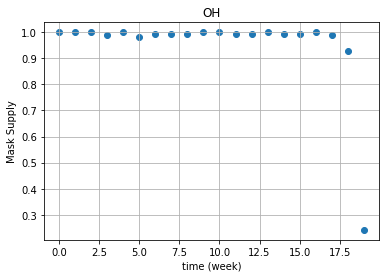

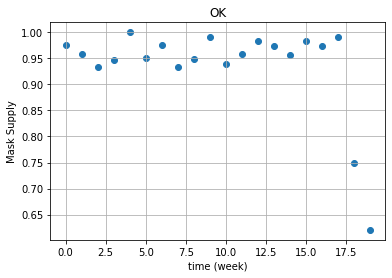

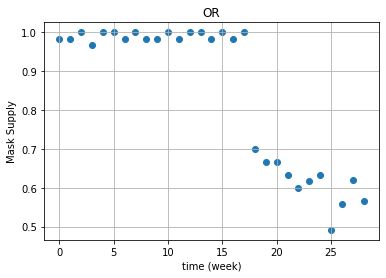

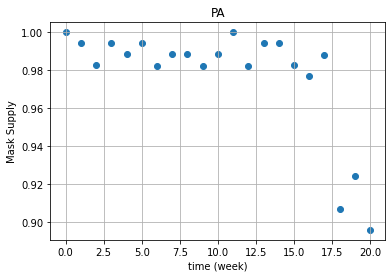

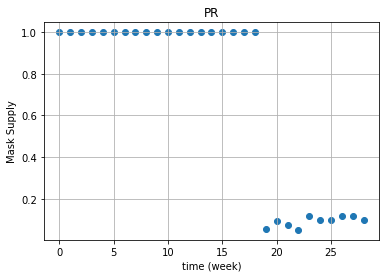

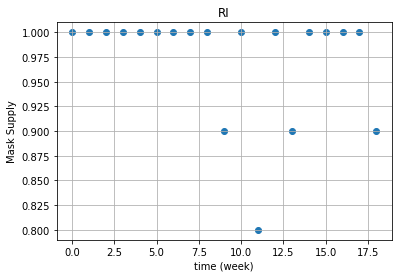

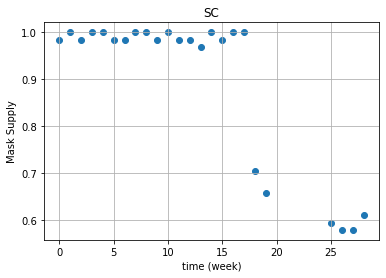

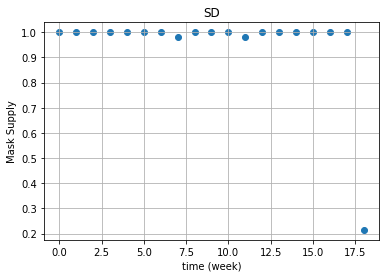

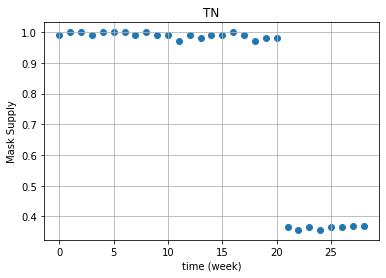

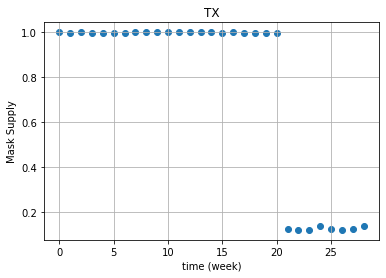

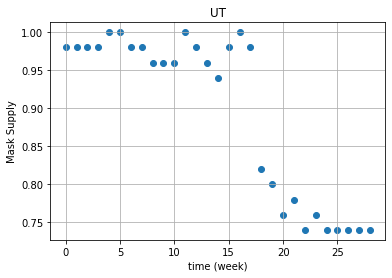

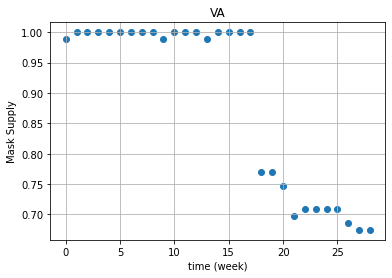

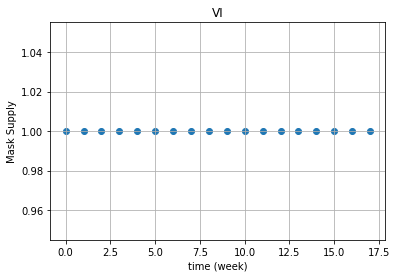

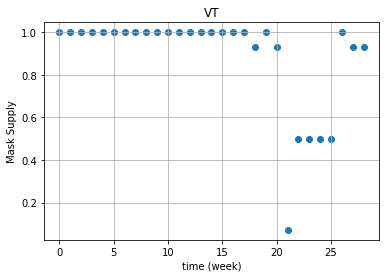

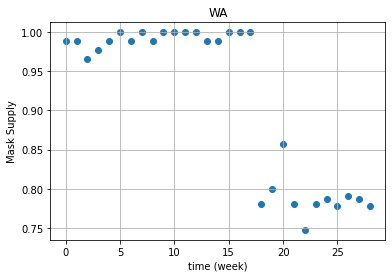

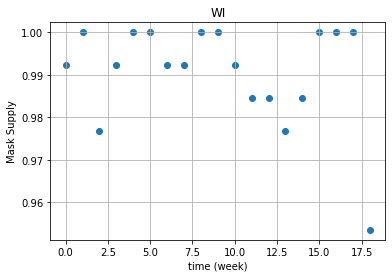

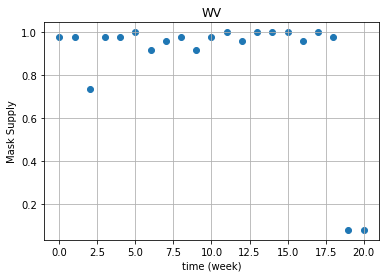

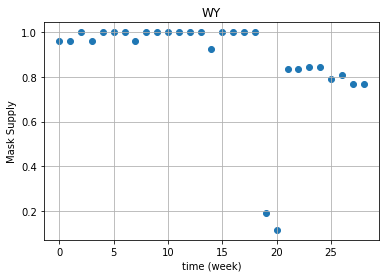

In [ ]:
state = df.state_x.unique()
for i in state:
  plot_time_series(df,i,'able_to_obtain_n95_masks')

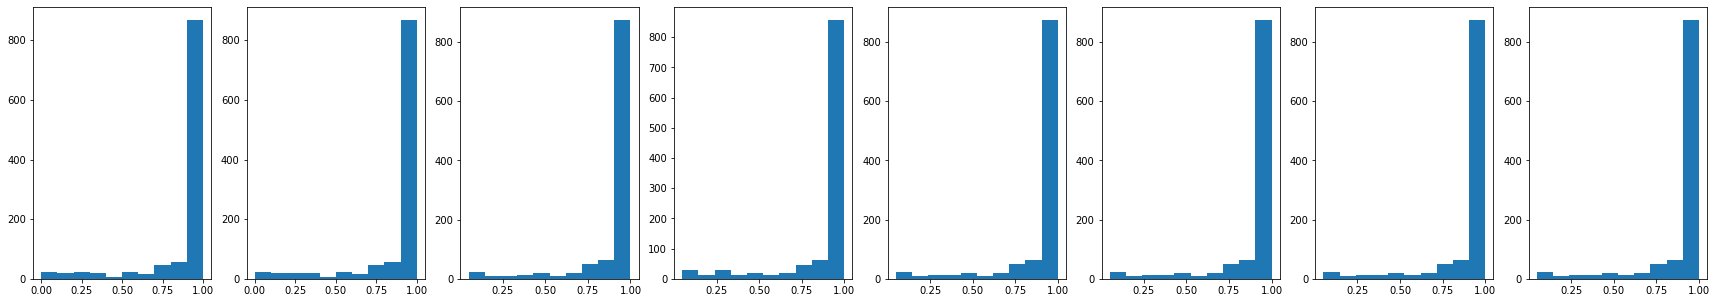

In [ ]:
afig, axs = plt.subplots(1, 8, figsize=(30, 5))
axs[0].hist(df['able_to_obtain_ventilator_supplies'])
axs[1].hist(df['able_to_obtain_ventilator_medications'])
axs[2].hist(df['able_to_obtain_n95_masks'])
axs[3].hist(df['able_to_obtain_paprs'])
axs[4].hist(df['able_to_obtain_surgical_masks'])
axs[5].hist(df['able_to_obtain_eye_protection'])
axs[6].hist(df['able_to_obtain_single_use_gowns'])
axs[7].hist(df['able_to_obtain_gloves'])
#plt.figure(figsize=(30, 30))
plt.show()

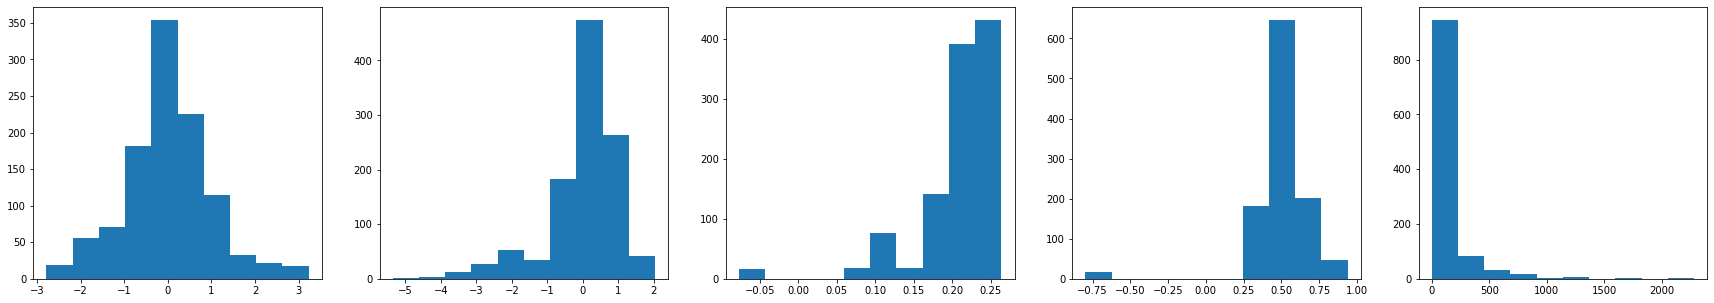

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(30, 5))
axs[0].hist(df['inpatient_beds_used_7_day_sum'])
axs[1].hist(df['icu_beds_used_7_day_sum'])
axs[2].hist(df['latitude'])
axs[3].hist(df['longitude'])
axs[4].hist(df['new_case'])
plt.show()

In [ ]:
state_list = ['AS', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY',
              'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 
              'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR',
              'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI',
              'WV' 'WY']

train_df_ordered_4 = pd.DataFrame()
train_df_ordered_5 = pd.DataFrame()
train_df_ordered_inbalanced = pd.DataFrame()
test_df_ordered = pd.DataFrame()
for state in state_list:
  temp = df.loc[df['state_x'] == state].sort_values(by=['collection_week'])
  train_df_ordered_inbalanced = pd.concat([train_df_ordered_inbalanced, temp.iloc[:int(temp.shape[0] * 5/6),:]], sort=False)
  train_df_ordered_4 = pd.concat([train_df_ordered_4, temp.iloc[:int(temp.shape[0] * 4/6),:]], sort=False)
  train_df_ordered_5 = pd.concat([train_df_ordered_5, temp.iloc[int(temp.shape[0] * 4/6):int(temp.shape[0] * 5/6),:]], sort=False)
  test_df_ordered = pd.concat([test_df_ordered, temp.iloc[int(temp.shape[0] * 5/6):,:]], sort=False)

In [ ]:
def LROI(train_df_ordered_inbalanced, test_df_ordered):
  train_x = train_df_ordered_inbalanced.iloc[:,[1,10,11,12,13,14]].to_numpy()
  train_y = train_df_ordered_inbalanced.iloc[:,2:10].to_numpy()
 
  test_x = test_df_ordered.iloc[:,[1,10,11,12,13,14]].to_numpy()
  test_y = test_df_ordered.iloc[:,2:10].to_numpy()
  
  model_ordered_inbalanced = LinearRegression()
  model_ordered_inbalanced.fit(train_x, train_y)
  y_pred = model_ordered_inbalanced.predict(test_x)
  model_ordered_inbalanced.score(test_x, test_y)

  rmse = mean_squared_error(test_y, y_pred, squared=True)
  r2 = r2_score(test_y, y_pred)
  return rmse, r2, model_ordered_inbalanced

In [ ]:
rmse, r2, model_ordered_inbalanced = LROI(train_df_ordered_inbalanced, test_df_ordered)
print("Linear Regression model with ordered train-test splits (without random under sampling)")
print("Root Mean Squared Error: %.2f" % rmse)
print("Coefficient of determination: %.2f" % r2)

Linear Regression model with ordered train-test splits (without random under sampling)
Root Mean Squared Error: 0.07
Coefficient of determination: 0.12


In [ ]:
def LROB(train_df_ordered_balanced, test_df_ordered):
  train_x = train_df_ordered_balanced.iloc[:,[1,10,11,12,13,14]].to_numpy()
  train_y = train_df_ordered_balanced.iloc[:,2:10].to_numpy()
  test_x = test_df_ordered.iloc[:,[1,10,11,12,13,14]].to_numpy()
  test_y = test_df_ordered.iloc[:,2:10].to_numpy()

  model_ordered_balanced = LinearRegression()
  model_ordered_balanced.fit(train_x, train_y)
  y_pred = model_ordered_balanced.predict(test_x)
  model_ordered_balanced.score(test_x, test_y)

  rmse = mean_squared_error(test_y, y_pred, squared=True)
  r2 = r2_score(test_y, y_pred)
  return rmse, r2, model_ordered_balanced


In [ ]:
rmse_LROB = []
r2_LROB = []

for i in range(100):
  #shuffle the training data (less important target domain)
  train_df_ordered_4_random = train_df_ordered_4.sample(frac=1).reset_index(drop=True)
  #randomly pick 1/4 of the training data 4 (less important target domain)
  train_df_ordered_4_random = train_df_ordered_4_random.sample(frac=0.25)

  #combine train_df_ordered_4_random with train_df_ordered_5 to got a balanced training data
  train_df_ordered_balanced = pd.concat([train_df_ordered_4_random , train_df_ordered_5], ignore_index=True)

  rmse_temp, r2_temp, model_ordered_balanced = LROB(train_df_ordered_balanced, test_df_ordered)

  # print("Linear Regression model with balance target domain %.2f th random under sampling" % (i+1))
  # print("Root Mean Squared Error: %.2f" % rmse_temp)
  # print("Coefficient of determination: %.2f" % r2_temp)

  rmse_LROB.append(rmse_temp)
  r2_LROB.append(r2_temp)

print("Linear Regression model with ordered train-test split (with random under sampling, average from 100 times random under sampling)")
print("Root Mean Squared Error: %.2f" % mean(rmse_LROB))
print("Coefficient of determination: %.2f" % mean(r2_LROB))

Linear Regression model with ordered train-test split (with random under sampling, average from 100 times random under sampling)
Root Mean Squared Error: 0.06
Coefficient of determination: 0.25


In [ ]:
def LRR(train_df_random, test_df_random):
  
  train_x = train_df_random.iloc[:,[1,10,11,12,13,14]].to_numpy()
  train_y = train_df_random.iloc[:,2:10].to_numpy()
  test_x = test_df_random.iloc[:,[1,10,11,12,13,14]].to_numpy()
  test_y = test_df_random.iloc[:,2:10].to_numpy()

  model_random = LinearRegression()
  model_random.fit(train_x, train_y)
  y_pred = model_random.predict(test_x)
  model_random.score(test_x, test_y)

  rmse = mean_squared_error(test_y, y_pred, squared=True)
  r2 = r2_score(test_y, y_pred)
  return rmse, r2, model_random

In [ ]:
rmse_LRR = []
r2_LRR = []


for i in range(100):
  #shuffle the data
  df_random = df.sample(frac=1).reset_index(drop=True)
  #split the data to train and test data
  train_df_random = df_random.iloc[:int(df_random.shape[0] * 0.8),:]
  test_df_random = df_random.iloc[int(df_random.shape[0] * 0.8):,:]

  rmse_temp, r2_temp, model_random_temp = LRR(train_df_random,test_df_random)

  rmse_LRR.append(rmse_temp)
  r2_LRR.append(r2_temp)

print("Linear Regression model with random train-test split (average from 100 times random splits)")
print("Root Mean Squared Error: %.2f" % mean(rmse_LRR))
print("Coefficient of determination: %.2f" % mean(r2_LRR))


Linear Regression model with random train-test split (average from 100 times random splits)
Root Mean Squared Error: 0.03
Coefficient of determination: 0.31


In [ ]:
#predict masks
def plot_ordered(model, train_df, test_df, state, category):

  state_train = train_df.loc[train_df['state_x'] == state].sort_values(by=['collection_week'])
  state_test = test_df.loc[test_df['state_x'] == state].sort_values(by=['collection_week'])
  
  train_x = state_train['collection_week']
  train_y = state_train[category]
  test_x = state_test['collection_week']
  test_y = state_test[category]

  input = state_test.iloc[:,[1,10,11,12,13,14]].to_numpy()
  #y_pred_balanced = model_ordered_balanced.predict(test_x)
  y_pred = model.predict(input)

  category_index = train_df.columns.get_loc(category) - 2
  y_category_pred = y_pred[:,[category_index]]

  f, ax = plt.subplots(1, 1, figsize=(4, 3))
  ax.set_title(state)
  # Plot training data as black dots
  ax.scatter(train_x, train_y, s = 10, color="black")
  # Plot testing data as red dots
  ax.scatter(test_x, test_y, s = 10, color = "red")
  # Plot predictive means as blue line
  lx = train_x.to_list() + input[:,0].tolist()
  ly = train_y.to_list() + y_category_pred.flatten().tolist()
  ax.plot(lx, ly, color = 'blue')
  ax.set_ylim([0, 2])
  ax.legend(['Prediction', 'Train Data','Test Data'])
  ax.set_ylabel('Supply')
  ax.set_xlabel('Week')

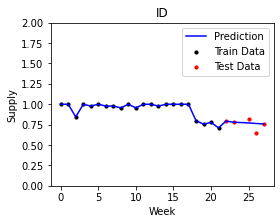

In [ ]:
state = 'ID'
category = 'able_to_obtain_n95_masks'
train_df = train_df_ordered_inbalanced
test_df = test_df_ordered
model = model_ordered_inbalanced


plot_ordered(model, train_df, test_df, state, category)

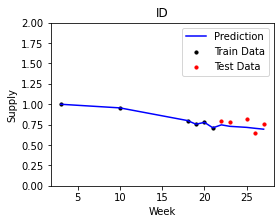

In [ ]:
state = 'ID'
category = 'able_to_obtain_n95_masks'
train_df = train_df_ordered_balanced
test_df = test_df_ordered
model = model_ordered_balanced


plot_ordered(model, train_df, test_df, state, category)

In [ ]:
state_train

,state_x,collection_week,able_to_obtain_ventilator_supplies,able_to_obtain_ventilator_medications,able_to_obtain_n95_masks,able_to_obtain_paprs,able_to_obtain_surgical_masks,able_to_obtain_eye_protection,able_to_obtain_single_use_gowns,able_to_obtain_gloves,inpatient_beds_used_7_day_sum,icu_beds_used_7_day_sum,latitude,longitude,new_case
71,ID,17.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.271248,0.531052,0.246394,0.636739,20.311111
191,ID,18.0,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.660055,0.828559,0.246394,0.636739,42.683333
192,ID,19.0,0.755556,0.755556,0.755556,0.755556,0.755556,0.755556,0.755556,0.755556,1.348228,0.639670,0.246394,0.636739,70.138889
193,ID,20.0,0.777778,0.777778,0.777778,0.355556,0.777778,0.777778,0.777778,0.777778,1.171750,0.649469,0.246394,0.636739,91.233333
194,ID,21.0,0.711111,0.711111,0.711111,0.333333,0.711111,0.711111,0.711111,0.711111,2.082471,0.757208,0.246394,0.636739,111.016667


In [ ]:
state_train

,state_x,collection_week,able_to_obtain_ventilator_supplies,able_to_obtain_ventilator_medications,able_to_obtain_n95_masks,able_to_obtain_paprs,able_to_obtain_surgical_masks,able_to_obtain_eye_protection,able_to_obtain_single_use_gowns,able_to_obtain_gloves,inpatient_beds_used_7_day_sum,icu_beds_used_7_day_sum,latitude,longitude,new_case
128,ID,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.028097,-0.334289,0.246394,0.636739,42.538889
129,ID,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.811369,-0.062257,0.246394,0.636739,39.366667
130,ID,2.0,0.844444,0.844444,0.844444,0.844444,0.844444,0.844444,0.844444,0.844444,-0.814689,0.288669,0.246394,0.636739,47.961111
131,ID,3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.925001,-0.046615,0.246394,0.636739,47.094444
132,ID,4.0,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,-0.950528,-0.080774,0.246394,0.636739,52.000000
133,ID,5.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.083137,-0.389839,0.246394,0.636739,47.577778
134,ID,6.0,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,-1.118290,-0.199880,0.246394,0.636739,46.755556
135,ID,7.0,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,-0.431202,0.511552,0.246394,0.636739,45.544444
136,ID,8.0,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556,-0.083604,0.993334,0.246394,0.636739,36.633333
137,ID,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.151747,0.815171,0.246394,0.636739,28.211111


In [ ]:
y_category_pred.flatten()

array([0.93197199, 0.92649063, 0.92375518, 0.92240048, 0.92156315])

In [ ]:
ly

[1.0,
 1.0,
 0.8444444444444444,
 1.0,
 0.9777777777777776,
 1.0,
 0.9777777777777776,
 0.9777777777777776,
 0.9555555555555556,
 1.0,
 0.9555555555555556,
 1.0,
 1.0,
 0.9777777777777776,
 1.0,
 1.0,
 1.0,
 1.0,
 [0.9319719916834905],
 [0.9264906293156518],
 [0.9237551770792559],
 [0.9224004806762242],
 [0.9215631493875258]]

In [ ]:
np.array(ly).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(23,)

In [ ]:
train_y.shape

(18,)

In [ ]:
for i in state_list:
  plot_ordered(model_ordered_inbalanced, train_df_ordered_inbalanced, test_df_ordered, state = i,'able_to_obtain_n95_masks')

SyntaxError: ignored

In [ ]:
train_df_ordered_inbalanced.shape

In [ ]:
state_test = test_df_ordered.loc[test_df_ordered['state_x'] == ''].sort_values(by=['collection_week'])
test_x = state_test.iloc[:,[1,10,11,12,13,14]].to_numpy()
test_y = state_test.iloc[:,[4]].to_numpy()

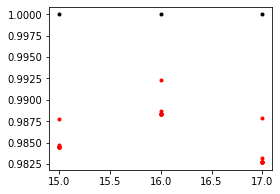

In [ ]:
plot_ordered('AS')

In [ ]:
# Initialize plot
  f, ax = plt.subplots(1, 1, figsize=(4, 3))
  ax.set_title(state)

  # Get upper and lower confidence bounds
  #lower, upper = y_pred.confidence_region()
  # Plot training data as black dots
  #ax.plot(train_x.numpy(), train_y.numpy(), '.k')
  # Plot testing data as red dots
  ax.plot(test_x.numpy(), test_y.numpy(), '.r')
  # Plot predictive means as blue line
  ax.plot(input[:,0].numpy(), y_pred.mean[:,2].numpy(), 'b')

  # Shade between the lower and upper confidence bounds
  ax.fill_between(input[:,0].numpy(), lower[:,0].numpy(), upper[:,0].numpy(), alpha=0.5)
  ax.set_ylim([0, 2])
  ax.legend(['Train Data', 'Test Data', 'Mean', 'Confidence'])